In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [48]:
df = pd.read_csv('train.csv/train.csv')

In [49]:
# Set pandas options to display full content
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



In [50]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


In [51]:
# Load test data
test_df = pd.read_csv('test.csv/test.csv')
print(f"Test data shape: {test_df.shape}")
print("\nTest data columns:")
print(test_df.columns.tolist())

Test data shape: (4398, 22)

Test data columns:
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']


In [52]:
df_clean = df[df['revenue'] > 0].copy()
print(f"Rows after removing zero/negative revenue: {len(df_clean)}")

Rows after removing zero/negative revenue: 3000


In [53]:
df_clean.head(1)

id  \
0   1   

                                                                                                                                                 belongs_to_collection  \
0  [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]   

     budget                          genres homepage    imdb_id  \
0  14000000  [{'id': 35, 'name': 'Comedy'}]      NaN  tt2637294   

  original_language          original_title  \
0                en  Hot Tub Time Machine 2   

                                                                                                                                                      overview  \
0  When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.   

   popularity                       poster_path  \
0    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   

                                                                                                                 production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]   

                                         production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States of America'}]      2/20/15   

   runtime                          spoken_languages    status  \
0     93.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                tagline  \
0  The Laws of Space and Time are About to be Violated.   

                    title  \
0  Hot Tub Time Machine 2   

                                                                                                                                                  Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [54]:
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("Dataset columns:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   flo

Revenue statistics:
count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

Zero revenues: 0
Negative revenues: 0


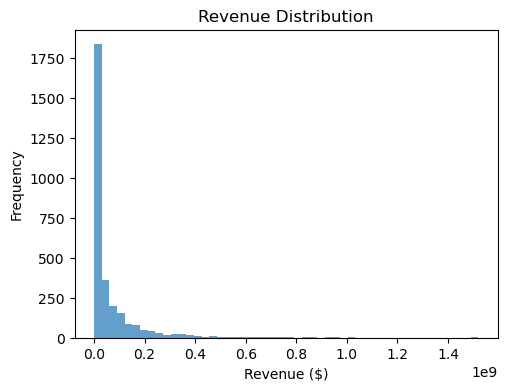

In [55]:
# Look at the revenue column (target variable)
print("Revenue statistics:")
print(df['revenue'].describe())
print(f"\nZero revenues: {(df['revenue'] == 0).sum()}")
print(f"Negative revenues: {(df['revenue'] < 0).sum()}")

# Show revenue distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['revenue'], bins=50, alpha=0.7)
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')


plt.show()

In [56]:
# Examine key numeric features
numeric_cols = ['budget', 'popularity', 'runtime', 'revenue']

print("Numeric Features Summary:")
print(df[numeric_cols].describe())

print(f"\nCorrelations with Revenue:")
for col in ['budget', 'popularity', 'runtime']:
    corr = df[col].corr(df['revenue'])
    print(f"{col}: {corr:.3f}")

Numeric Features Summary:
             budget   popularity      runtime       revenue
count  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   2.253133e+07     8.463274   107.856571  6.672585e+07
std    3.702609e+07    12.104000    22.086434  1.375323e+08
min    0.000000e+00     0.000001     0.000000  1.000000e+00
25%    0.000000e+00     4.018053    94.000000  2.379808e+06
50%    8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2.900000e+07    10.890983   118.000000  6.891920e+07
max    3.800000e+08   294.337037   338.000000  1.519558e+09

Correlations with Revenue:
budget: 0.753
popularity: 0.461
runtime: 0.216


In [57]:
# Deep exploration of text features - these are likely our most predictive features!
print("=== GENRES ANALYSIS ===")
print(f"Sample genres (first 5):")
for i, genre in enumerate(df['genres'].dropna().head(5)):
    print(f"{i+1}. {genre}")

print(f"\nGenres data type: {type(df['genres'].iloc[0])}")
print(f"Missing genres: {df['genres'].isnull().sum()}")

print("\n" + "="*60)
print("=== CAST ANALYSIS ===")
print(f"Sample cast (first 3):")
for i, cast in enumerate(df['cast'].dropna().head(3)):
    print(f"{i+1}. {cast[:200]}...")  # Show first 200 characters

print(f"\nMissing cast: {df['cast'].isnull().sum()}")

print("\n" + "="*60)
print("=== PRODUCTION COMPANIES ANALYSIS ===")
print(f"Sample production companies (first 5):")
for i, company in enumerate(df['production_companies'].dropna().head(5)):
    print(f"{i+1}. {company}")

print(f"\nMissing production companies: {df['production_companies'].isnull().sum()}")

print("\n" + "="*60)
print("=== KEYWORDS ANALYSIS ===")
print(f"Sample keywords (first 3):")
for i, keywords in enumerate(df['Keywords'].dropna().head(3)):
    print(f"{i+1}. {keywords[:200]}...")  # Show first 200 characters

print(f"\nMissing keywords: {df['Keywords'].isnull().sum()}")

=== GENRES ANALYSIS ===
Sample genres (first 5):
1. [{'id': 35, 'name': 'Comedy'}]
2. [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
3. [{'id': 18, 'name': 'Drama'}]
4. [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
5. [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]

Genres data type: <class 'str'>
Missing genres: 7

=== CAST ANALYSIS ===
Sample cast (first 3):
1. [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id...
2. [{'cast_id': 1, 'character': 'Mia Thermopolis', 'credit_id': '52fe43fe9251416c7502561f', 'gender': 1, 'id': 1813, 'name': 'Anne Hathaway', 'order': 0, 'profile_path': '/jUMOKwSUBnTcMeN1HfhutiY49Ad.jpg...
3. [{'cast_id': 5, 'character': 'Andrew Neimann', 'credit_id': '52fe4ef7c3a36847f82b3fc3', 'gender': 2, 'id': 99

In [58]:
import json
import ast
from collections import Counter

# Function to safely parse JSON-like strings
def parse_json_column(text):
    if pd.isna(text):
        return []
    try:
        # Try to parse as JSON first
        return json.loads(text.replace("'", '"'))
    except:
        try:
            # Try literal_eval for Python-like strings
            return ast.literal_eval(text)
        except:
            return []

print("=== PARSING GENRES ===")
# Parse genres and extract genre names
df['genres_parsed'] = df['genres'].apply(parse_json_column)
df['genre_names'] = df['genres_parsed'].apply(lambda x: [item['name'] for item in x if isinstance(item, dict) and 'name' in item])

# Count most common genres
all_genres = []
for genres in df['genre_names']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
print("Top 10 most common genres:")
for genre, count in genre_counts.most_common(10):
    print(f"{genre}: {count} movies")

print(f"\nTotal unique genres: {len(genre_counts)}")

=== PARSING GENRES ===
Top 10 most common genres:
Drama: 1531 movies
Comedy: 1028 movies
Thriller: 789 movies
Action: 741 movies
Romance: 571 movies
Crime: 469 movies
Adventure: 439 movies
Horror: 301 movies
Science Fiction: 290 movies
Family: 260 movies

Total unique genres: 20


In [59]:
# Create binary features for top genres
top_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Crime', 'Adventure', 'Horror']

print("=== CREATING GENRE FEATURES ===")
for genre in top_genres:
    df[f'is_{genre}'] = df['genre_names'].apply(lambda x: 1 if genre in x else 0)
    count = df[f'is_{genre}'].sum()
    print(f"is_{genre}: {count} movies")

print("\n=== GENRE CORRELATIONS WITH REVENUE ===")
genre_correlations = []
for genre in top_genres:
    corr = df[f'is_{genre}'].corr(df['revenue'])
    genre_correlations.append((genre, corr))
    print(f"is_{genre}: {corr:.3f}")

# Sort by correlation strength
genre_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nGenres ranked by correlation strength:")
for genre, corr in genre_correlations:
    print(f"{genre}: {corr:.3f}")

=== CREATING GENRE FEATURES ===
is_Drama: 1531 movies
is_Comedy: 1028 movies
is_Thriller: 789 movies
is_Action: 741 movies
is_Romance: 571 movies
is_Crime: 469 movies
is_Adventure: 439 movies
is_Horror: 301 movies

=== GENRE CORRELATIONS WITH REVENUE ===
is_Drama: -0.158
is_Comedy: -0.031
is_Thriller: 0.007
is_Action: 0.185
is_Romance: -0.049
is_Crime: -0.023
is_Adventure: 0.328
is_Horror: -0.034

Genres ranked by correlation strength:
Adventure: 0.328
Action: 0.185
Drama: -0.158
Romance: -0.049
Horror: -0.034
Comedy: -0.031
Crime: -0.023
Thriller: 0.007


In [62]:
print("=== PARSING CAST DATA ===")
# Parse cast data to extract actor names
df['cast_parsed'] = df['cast'].apply(parse_json_column)
df['actor_names'] = df['cast_parsed'].apply(lambda x: [item['name'] for item in x if isinstance(item, dict) and 'name' in item])

# Get lead actors (first 3 in cast list, as they're ordered by importance)
df['lead_actors'] = df['actor_names'].apply(lambda x: x[:3] if len(x) >= 3 else x)

# Count most frequent lead actors
all_lead_actors = []
for actors in df['lead_actors']:
    all_lead_actors.extend(actors)

actor_counts = Counter(all_lead_actors)
print("Top 15 most frequent lead actors:")
for actor, count in actor_counts.most_common(15):
    print(f"{actor}: {count} movies")

print(f"\nTotal unique actors in lead roles: {len(actor_counts)}")

=== PARSING CAST DATA ===
Top 15 most frequent lead actors:
Robert De Niro: 25 movies
Denzel Washington: 19 movies
Mel Gibson: 19 movies
Samuel L. Jackson: 18 movies
Bruce Willis: 18 movies
Nicolas Cage: 18 movies
Mark Wahlberg: 18 movies
Sylvester Stallone: 17 movies
Morgan Freeman: 17 movies
George Clooney: 17 movies
Owen Wilson: 17 movies
Johnny Depp: 16 movies
Gene Hackman: 16 movies
Liam Neeson: 16 movies
Susan Sarandon: 16 movies

Total unique actors in lead roles: 4677


In [63]:
print("=== CREATING ACTOR FEATURES ===")
# Create binary features for top actors (who appear in 15+ movies)
top_actors = ['Robert De Niro', 'Denzel Washington', 'Mel Gibson', 'Samuel L. Jackson', 
              'Bruce Willis', 'Nicolas Cage', 'Mark Wahlberg', 'Sylvester Stallone',
              'Morgan Freeman', 'George Clooney', 'Johnny Depp', 'Liam Neeson']

for actor in top_actors:
    df[f'has_{actor.replace(" ", "_")}'] = df['lead_actors'].apply(lambda x: 1 if actor in x else 0)
    count = df[f'has_{actor.replace(" ", "_")}'].sum()
    print(f"has_{actor.replace(' ', '_')}: {count} movies")

print("\n=== ACTOR CORRELATIONS WITH REVENUE ===")
actor_correlations = []
for actor in top_actors:
    feature_name = f'has_{actor.replace(" ", "_")}'
    corr = df[feature_name].corr(df['revenue'])
    actor_correlations.append((actor, corr))
    print(f"{actor}: {corr:.3f}")

# Sort by correlation strength
actor_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nActors ranked by revenue correlation:")
for actor, corr in actor_correlations:
    print(f"{actor}: {corr:.3f}")

=== CREATING ACTOR FEATURES ===
has_Robert_De_Niro: 25 movies
has_Denzel_Washington: 19 movies
has_Mel_Gibson: 19 movies
has_Samuel_L._Jackson: 18 movies
has_Bruce_Willis: 18 movies
has_Nicolas_Cage: 18 movies
has_Mark_Wahlberg: 18 movies
has_Sylvester_Stallone: 17 movies
has_Morgan_Freeman: 17 movies
has_George_Clooney: 17 movies
has_Johnny_Depp: 16 movies
has_Liam_Neeson: 16 movies

=== ACTOR CORRELATIONS WITH REVENUE ===
Robert De Niro: -0.007
Denzel Washington: 0.012
Mel Gibson: 0.030
Samuel L. Jackson: 0.036
Bruce Willis: -0.005
Nicolas Cage: 0.022
Mark Wahlberg: 0.056
Sylvester Stallone: 0.043
Morgan Freeman: 0.006
George Clooney: 0.054
Johnny Depp: 0.118
Liam Neeson: 0.010

Actors ranked by revenue correlation:
Johnny Depp: 0.118
Mark Wahlberg: 0.056
George Clooney: 0.054
Sylvester Stallone: 0.043
Samuel L. Jackson: 0.036
Mel Gibson: 0.030
Nicolas Cage: 0.022
Denzel Washington: 0.012
Liam Neeson: 0.010
Robert De Niro: -0.007
Morgan Freeman: 0.006
Bruce Willis: -0.005


In [64]:
print("=== CURRENT DATAFRAME STATUS ===")
print(f"Shape: {df.shape}")
print(f"Total columns: {len(df.columns)}")

print("\n=== COLUMN NAMES ===")
print("Original columns:")
original_cols = ['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 
                'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 
                'production_companies', 'production_countries', 'release_date', 'runtime', 
                'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']

for col in original_cols:
    print(f"  {col}")

print("\nNew features created:")
new_cols = [col for col in df.columns if col not in original_cols]
for col in new_cols:
    print(f"  {col}")

print(f"\nTotal new features created: {len(new_cols)}")

=== CURRENT DATAFRAME STATUS ===
Shape: (3000, 48)
Total columns: 48

=== COLUMN NAMES ===
Original columns:
  id
  belongs_to_collection
  budget
  genres
  homepage
  imdb_id
  original_language
  original_title
  overview
  popularity
  poster_path
  production_companies
  production_countries
  release_date
  runtime
  spoken_languages
  status
  tagline
  title
  Keywords
  cast
  crew
  revenue

New features created:
  genres_parsed
  genre_names
  is_Drama
  is_Comedy
  is_Thriller
  is_Action
  is_Romance
  is_Crime
  is_Adventure
  is_Horror
  cast_parsed
  actor_names
  lead_actors
  has_Robert_De_Niro
  has_Denzel_Washington
  has_Mel_Gibson
  has_Samuel_L._Jackson
  has_Bruce_Willis
  has_Nicolas_Cage
  has_Mark_Wahlberg
  has_Sylvester_Stallone
  has_Morgan_Freeman
  has_George_Clooney
  has_Johnny_Depp
  has_Liam_Neeson

Total new features created: 25


In [66]:
print("=== PARSING PRODUCTION COMPANIES ===")
# Parse production companies
df['companies_parsed'] = df['production_companies'].apply(parse_json_column)
df['company_names'] = df['companies_parsed'].apply(lambda x: [item['name'] for item in x if isinstance(item, dict) and 'name' in item])

# Count most frequent production companies
all_companies = []
for companies in df['company_names']:
    all_companies.extend(companies)

company_counts = Counter(all_companies)
print("Top 20 most frequent production companies:")
for company, count in company_counts.most_common(20):
    print(f"{company}: {count} movies")

print(f"\nTotal unique production companies: {len(company_counts)}")

=== PARSING PRODUCTION COMPANIES ===
Top 20 most frequent production companies:
Warner Bros.: 202 movies
Universal Pictures: 188 movies
Paramount Pictures: 161 movies
Twentieth Century Fox Film Corporation: 138 movies
Columbia Pictures: 91 movies
Metro-Goldwyn-Mayer (MGM): 84 movies
New Line Cinema: 75 movies
Touchstone Pictures: 63 movies
Walt Disney Pictures: 62 movies
Columbia Pictures Corporation: 61 movies
TriStar Pictures: 53 movies
Relativity Media: 48 movies
Canal+: 46 movies
United Artists: 44 movies
Miramax Films: 40 movies
Village Roadshow Pictures: 36 movies
Regency Enterprises: 31 movies
BBC Films: 30 movies
Dune Entertainment: 30 movies
Working Title Films: 30 movies

Total unique production companies: 3695


In [67]:
print("=== CREATING STUDIO FEATURES ===")
# Create features for top studios (50+ movies)
top_studios = ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 
               'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
               'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures',
               'Walt Disney Pictures']

for studio in top_studios:
    feature_name = f'is_{studio.replace(" ", "_").replace(".", "").replace("(", "").replace(")", "").replace("-", "_")}'
    df[feature_name] = df['company_names'].apply(lambda x: 1 if studio in x else 0)
    count = df[feature_name].sum()
    print(f"{feature_name}: {count} movies")

print("\n=== STUDIO CORRELATIONS WITH REVENUE ===")
studio_correlations = []
for studio in top_studios:
    feature_name = f'is_{studio.replace(" ", "_").replace(".", "").replace("(", "").replace(")", "").replace("-", "_")}'
    corr = df[feature_name].corr(df['revenue'])
    studio_correlations.append((studio, corr))
    print(f"{studio}: {corr:.3f}")

# Sort by correlation strength
studio_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nStudios ranked by revenue correlation:")
for studio, corr in studio_correlations:
    print(f"{studio}: {corr:.3f}")

=== CREATING STUDIO FEATURES ===
is_Warner_Bros: 202 movies
is_Universal_Pictures: 188 movies
is_Paramount_Pictures: 161 movies
is_Twentieth_Century_Fox_Film_Corporation: 138 movies
is_Columbia_Pictures: 91 movies
is_Metro_Goldwyn_Mayer_MGM: 84 movies
is_New_Line_Cinema: 75 movies
is_Touchstone_Pictures: 63 movies
is_Walt_Disney_Pictures: 62 movies

=== STUDIO CORRELATIONS WITH REVENUE ===
Warner Bros.: 0.105
Universal Pictures: 0.081
Paramount Pictures: 0.101
Twentieth Century Fox Film Corporation: 0.075
Columbia Pictures: 0.069
Metro-Goldwyn-Mayer (MGM): 0.002
New Line Cinema: 0.091
Touchstone Pictures: 0.010
Walt Disney Pictures: 0.250

Studios ranked by revenue correlation:
Walt Disney Pictures: 0.250
Warner Bros.: 0.105
Paramount Pictures: 0.101
New Line Cinema: 0.091
Universal Pictures: 0.081
Twentieth Century Fox Film Corporation: 0.075
Columbia Pictures: 0.069
Touchstone Pictures: 0.010
Metro-Goldwyn-Mayer (MGM): 0.002
